In [1]:
import pandas as p
import seaborn as sb
import numpy as n
%matplotlib inline
import matplotlib.pyplot as pl

In [2]:
pdata_frame = p.read_csv("DDoS_Modeling_data.csv", sep=',', index_col =
'Sl Num', names = ["Sl Num", "Time", "Source",
"Destination","Volume", "Protocol"])
pdata_frame.head(n=10)

Time         Source      Destination  Volume Protocol
Sl Num                                                             
1       1521039662    192.168.0.1   igmp.mcast.net       5     IGMP
2       1521039663    192.168.0.2  239.255.255.250       1     IGMP
3       1521039666    192.168.0.2     192.168.10.1       2      UDP
4       1521039669   192.168.10.2      192.168.0.8      20      DNS
5       1521039671   192.168.10.2      192.168.0.8       1      TCP
6       1521039673    192.168.0.1      192.168.0.2       1      TCP
7       1521039674    192.168.0.2      192.168.0.1       1      TCP
8       1521039675    192.168.0.1      192.168.0.2       5      DNS
9       1521039676    192.168.0.2     192.168.10.8       2      DNS
10      1521288435  192.168.140.9  245.203.172.182      10     IGMP

In [3]:
import time
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1521388078))

'2018-03-18 15:47:58'

In [4]:
pdata_frame['Newtime'] = pdata_frame['Time'].apply(lambda x: 
                                                  time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(float(x))))

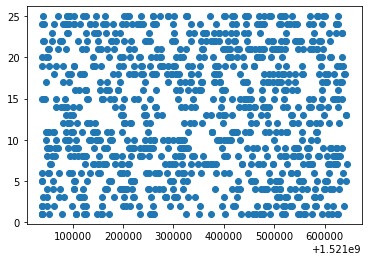

In [5]:
pl.scatter(pdata_frame['Time'], pdata_frame['Volume'])
pl.show()

In [6]:
# Feauture computation
_time = pdata_frame['Newtime']
edited_time = []
# for row in _time.index:
arr = _time.str.split(':') # generate new array based
for i in _time.index:
    trunc_time = str(arr[i][0]) + ":" + str(arr[i][1]) + ":00"
    edited_time.append(trunc_time)
edited_time[1]

'2018-03-14 15:01:00'

In [13]:
source = pdata_frame['Source']
connection_count = { }
for s in source:
    for x in edited_time:
        if x in connection_count:
            value = connection_count[s][x]
            value = value + 1
            connection_count[s][x] = value
        else:
                connection_count[s][x] = 1
connection_count[source[1]][edited_time[25]]

KeyError: '192.168.0.1'